## Load datasets

In [1]:
import pandas as pd
import os

dfs_train = {}
dfs_val = {}
for file in os.listdir("vectorized_data"):
    if file.endswith("train.csv"):
        df = pd.read_csv("vectorized_data/" + file, index_col=0)
        key = file.split("_")[-2]
        dfs_train[key] = df
    elif file.endswith("val.csv"):
        df = pd.read_csv("vectorized_data/" + file, index_col=0)
        key = file.split("_")[-2]
        dfs_val[key] = df

for key in dfs_train:
    dfs_train[key] = {
        'label': dfs_train[key]["category1"],
        'data': dfs_train[key].drop(columns=["category1"])
    }

    print(f"DFs train {key} (data):{dfs_train[key]['data'].shape}")

for key in dfs_val:
    dfs_val[key] = {
        'label': dfs_val[key]["category1"],
        'data': dfs_val[key].drop(columns=["category1"])
    }

    print(f"DFs validation {key} (data):{dfs_val[key]['data'].shape}")

DFs train 0.025 (data):(15557, 138)
DFs train 0.05 (data):(15557, 54)
DFs train 0.01 (data):(15557, 377)
DFs train 0.1 (data):(15557, 19)
DFs train 0.075 (data):(15557, 30)
DFs validation 0.01 (data):(15556, 377)
DFs validation 0.05 (data):(15556, 54)
DFs validation 0.025 (data):(15556, 138)
DFs validation 0.1 (data):(15556, 19)
DFs validation 0.075 (data):(15556, 30)


## Evaluate accuracy with k-NN

### Determine best vectorizer min_df value

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def evaluate_classification_single(knn, data, data_class):
    y_pred = knn.predict(data)
    return accuracy_score(data_class, y_pred)

def evaluate_classification_dataset(df_train, df_val, n_neighbors):
    accuracy_train = []
    accuracy_val = []
    for k in n_neighbors:
        knn = KNeighborsClassifier(n_neighbors=k, metric='cosine')
        knn.fit(df_train['data'], df_train['label'])
        accuracy_train.append(evaluate_classification_single(knn, df_train['data'], df_train['label']))
        accuracy_val.append(evaluate_classification_single(knn, df_val['data'], df_val['label']))
    return accuracy_train, accuracy_val



In [3]:
n_neighbors = [2, 5, 10, 15, 20, 25]
# n_neighbors = [1, 3, 5, 7, 9, 11, 13, 15]
accuracies = {}

for key in dfs_train:
    print(f'Evaluating dataset {key}')
    acc_train, acc_val = evaluate_classification_dataset(dfs_train[key], dfs_val[key], n_neighbors)
    accuracies[key] = {
        'train': acc_train,
        'val': acc_val
    }
    # print(f'--> Accuracy lengths ({key}): \n {len(acc_train)}\n {len(acc_val)}')

Evaluating dataset 0.025
Evaluating dataset 0.05
Evaluating dataset 0.01
Evaluating dataset 0.1
Evaluating dataset 0.075


In [4]:
def plot_accuracy(accuracies, n_neighbors):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 5))

    for key in accuracies:
        plt.subplot(1, 2, 1)
        plt.plot(n_neighbors, accuracies[key]['train'], label=f'Train {key}')
        plt.xlabel('Number of Neighbors')
        plt.ylabel('Accuracy')
        plt.title('Train Accuracy')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(n_neighbors, accuracies[key]['val'], label=f'Validation {key}')
        plt.xlabel('Number of Neighbors')
        plt.ylabel('Accuracy')
        plt.title('Validation Accuracy')
        plt.legend()

    plt.show()

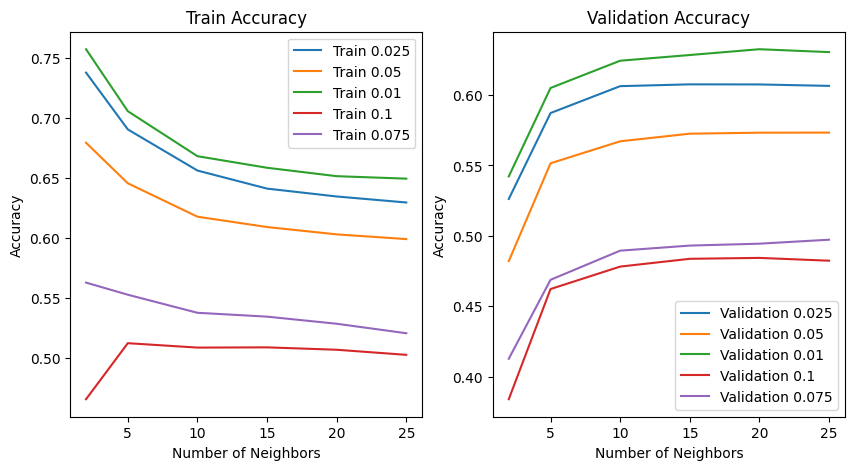

In [5]:
plot_accuracy(accuracies, n_neighbors)

### Create reduced datasets

In [6]:
# Based on the plot, we can see that the best value for min_df is:
min_df_val = '0.01'

In [7]:
data = dfs_train[min_df_val]
data['label'].value_counts()

category1
Equipamentos de informática (falha/substituição/instalação/configuração)    5074
Habilitação/Acesso a sistemas                                               4417
Programa/Sistema (instalação/configuração/erros/dúvidas/desenvolvimento)    2793
Conexão de dados/rede                                                       1293
Equipamentos de microinformática                                             570
Redes e conectividade de dados                                               288
Sistemas e serviços                                                          281
Dúvidas, informações e orientações                                           239
Portal/Internet/Intranet (configuração/falha/dúvidas)                        145
Informação eleitoral (relatórios/consultas/dúvidas)                          142
Suporte presencial a eventos                                                  85
Suporte remoto a eventos                                                      50
Incidente de Segur

## Training Models

### Using the best vectorized data without changes

### K-Nearest Neighbors (KNN) ###
Acurácia: 0.5782
Recall (weighted): 0.5782
Relatório de Classificação:
                                                                          precision    recall  f1-score   support

                                             Central de Atendimento STIE       0.25      0.22      0.24         9
                                                   Conexão de dados/rede       0.42      0.41      0.41      1321
                                      Dúvidas, informações e orientações       0.52      0.33      0.41       241
Equipamentos de informática (falha/substituição/instalação/configuração)       0.69      0.74      0.71      5094
                                        Equipamentos de microinformática       0.39      0.13      0.19       597
                                           Habilitação/Acesso a sistemas       0.55      0.77      0.64      4303
                                    Incidente de Segurança da Informação       0.00      0.00   

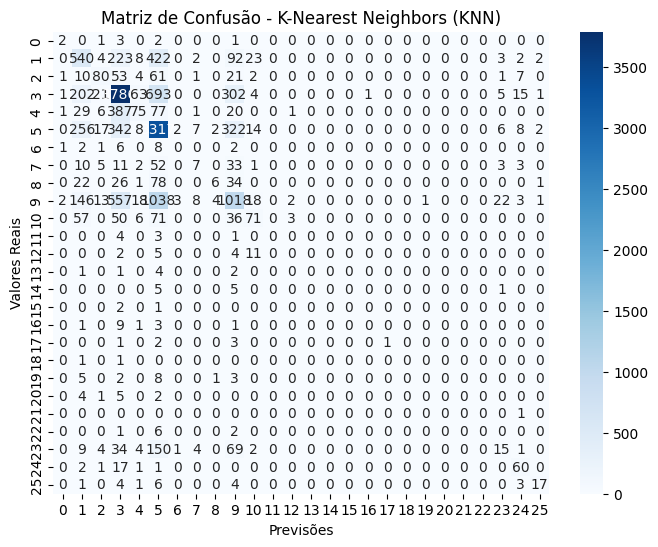

### Random Forest ###
Acurácia: 0.6633
Recall (weighted): 0.6633
Relatório de Classificação:
                                                                          precision    recall  f1-score   support

                                             Central de Atendimento STIE       0.50      0.11      0.18         9
                                                   Conexão de dados/rede       0.63      0.36      0.46      1321
                                      Dúvidas, informações e orientações       0.85      0.34      0.49       241
Equipamentos de informática (falha/substituição/instalação/configuração)       0.71      0.85      0.77      5094
                                        Equipamentos de microinformática       0.56      0.13      0.20       597
                                           Habilitação/Acesso a sistemas       0.69      0.81      0.74      4303
                                    Incidente de Segurança da Informação       1.00      0.00      0.00     

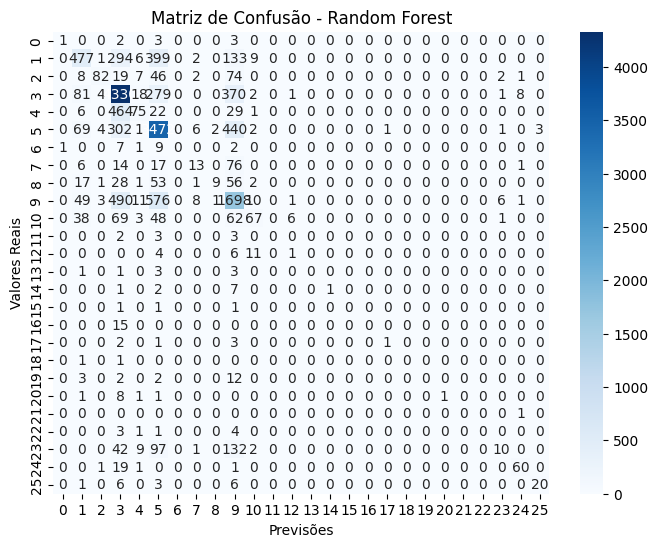

In [8]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    confusion_matrix,
    classification_report,
)
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
train_data = dfs_train[min_df_val]
val_data = dfs_val[min_df_val]

# Separar features (X) e labels (y) dos dados de treino e validação
X_train = train_data['data']
y_train = train_data['label']

X_val = val_data['data']
y_val = val_data['label']

def avaliar_modelo(nome_modelo, modelo, X_val, y_val):
    # Fazer previsões
    y_pred = modelo.predict(X_val)
    
    # Calcular métricas
    acuracia = accuracy_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred, average='weighted', zero_division=1)  # Ajuste conforme a natureza dos dados
    matriz_confusao = confusion_matrix(y_val, y_pred)
    
    # Exibir métricas
    print(f"### {nome_modelo} ###")
    print(f"Acurácia: {acuracia:.4f}")
    print(f"Recall (weighted): {recall:.4f}")
    print("Relatório de Classificação:")
    print(classification_report(y_val, y_pred, zero_division=1))
    
    # Plotar a matriz de confusão
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusão - {nome_modelo}')
    plt.xlabel('Previsões')
    plt.ylabel('Valores Reais')
    plt.show()

# Treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Avaliar o modelo KNN
avaliar_modelo("K-Nearest Neighbors (KNN)", knn, X_val, y_val)

# Treinar o modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Avaliar o modelo Random Forest
avaliar_modelo("Random Forest", rf, X_val, y_val)

### Reducing Classes

In [10]:
def generate_new_labels(old_labels):
    labels = [
        "Equipamentos de informática (falha/substituição/instalação/configuração)",
        "Habilitação/Acesso a sistemas",
        "Programa/Sistema (instalação/configuração/erros/dúvidas/desenvolvimento)"
        ]
    new_labels = []
    for y in old_labels:
        if y not in labels:
            new_labels.append("Outros")
        else:
            new_labels.append(y)
    return new_labels
new_labels_train = generate_new_labels(y_train)
new_labels_val = generate_new_labels(y_val)
new_labels_train = pd.Series(new_labels_train, name='category1')
new_labels_val = pd.Series(new_labels_val, name='category1')
new_labels_train.value_counts()

category1
Equipamentos de informática (falha/substituição/instalação/configuração)    5074
Habilitação/Acesso a sistemas                                               4417
Outros                                                                      3273
Programa/Sistema (instalação/configuração/erros/dúvidas/desenvolvimento)    2793
Name: count, dtype: int64

### K-Nearest Neighbors (KNN) ###
Acurácia: 0.5979
Recall (weighted): 0.5979
Relatório de Classificação:
                                                                          precision    recall  f1-score   support

Equipamentos de informática (falha/substituição/instalação/configuração)       0.69      0.74      0.71      5094
                                           Habilitação/Acesso a sistemas       0.55      0.78      0.64      4303
                                                                  Outros       0.56      0.38      0.46      3305
Programa/Sistema (instalação/configuração/erros/dúvidas/desenvolvimento)       0.54      0.32      0.40      2854

                                                                accuracy                           0.60     15556
                                                               macro avg       0.58      0.56      0.55     15556
                                                            weighted avg       0.59      0.60  

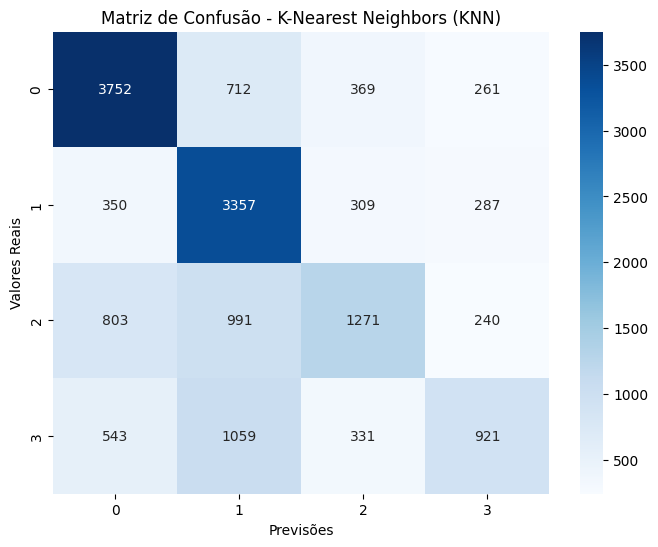

### Random Forest ###
Acurácia: 0.6837
Recall (weighted): 0.6837
Relatório de Classificação:
                                                                          precision    recall  f1-score   support

Equipamentos de informática (falha/substituição/instalação/configuração)       0.74      0.83      0.78      5094
                                           Habilitação/Acesso a sistemas       0.71      0.79      0.75      4303
                                                                  Outros       0.63      0.45      0.52      3305
Programa/Sistema (instalação/configuração/erros/dúvidas/desenvolvimento)       0.57      0.54      0.55      2854

                                                                accuracy                           0.68     15556
                                                               macro avg       0.66      0.65      0.65     15556
                                                            weighted avg       0.68      0.68      0.68    

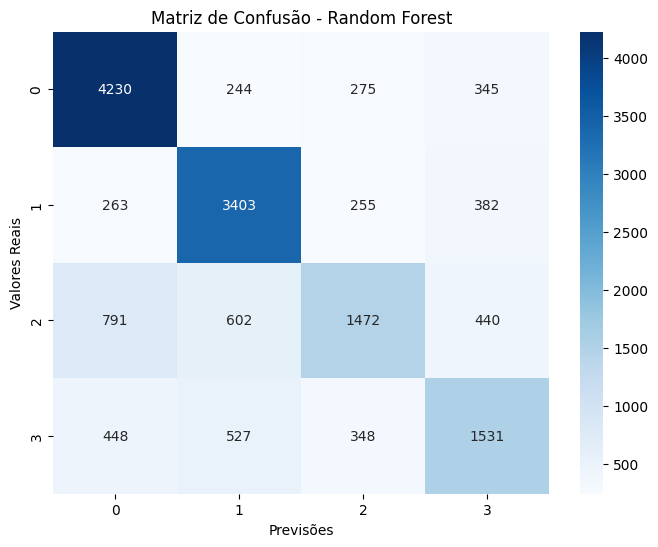

In [11]:
# Treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, new_labels_train)

# Avaliar o modelo KNN
avaliar_modelo("K-Nearest Neighbors (KNN)", knn, X_val, new_labels_val)

# Treinar o modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, new_labels_train)

# Avaliar o modelo Random Forest
avaliar_modelo("Random Forest", rf, X_val, new_labels_val)

### Oversampling

In [12]:
from imblearn.over_sampling import SMOTE

over_sample_params = {
    "Equipamentos de informática (falha/substituição/instalação/configuração)": 5074,
    "Habilitação/Acesso a sistemas": 5074,
    "Programa/Sistema (instalação/configuração/erros/dúvidas/desenvolvimento)": 5074,
    "Outros": 5074
}

# Aplicar a técnica SMOTE
smote = SMOTE(sampling_strategy=over_sample_params)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, new_labels_train)
y_train_resampled.value_counts()

category1
Habilitação/Acesso a sistemas                                               5074
Programa/Sistema (instalação/configuração/erros/dúvidas/desenvolvimento)    5074
Equipamentos de informática (falha/substituição/instalação/configuração)    5074
Outros                                                                      5074
Name: count, dtype: int64

### K-Nearest Neighbors (KNN) ###
Acurácia: 0.5339
Recall (weighted): 0.5339
Relatório de Classificação:
                                                                          precision    recall  f1-score   support

Equipamentos de informática (falha/substituição/instalação/configuração)       0.76      0.50      0.61      5094
                                           Habilitação/Acesso a sistemas       0.68      0.56      0.61      4303
                                                                  Outros       0.39      0.54      0.45      3305
Programa/Sistema (instalação/configuração/erros/dúvidas/desenvolvimento)       0.38      0.54      0.45      2854

                                                                accuracy                           0.53     15556
                                                               macro avg       0.55      0.54      0.53     15556
                                                            weighted avg       0.59      0.53  

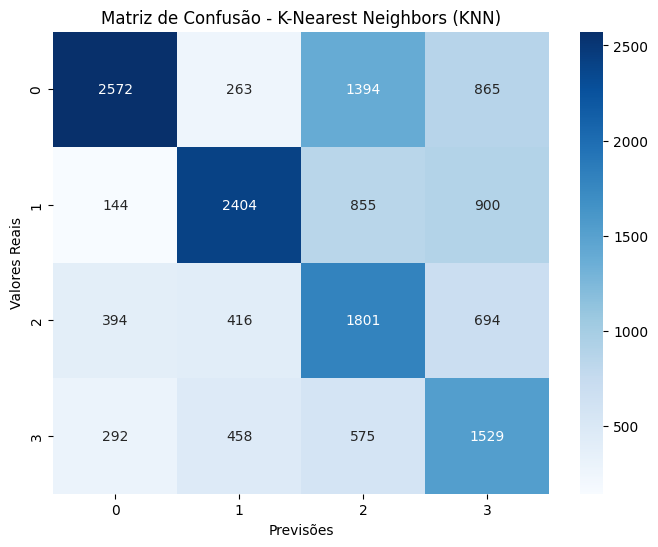

### Random Forest ###
Acurácia: 0.6845
Recall (weighted): 0.6845
Relatório de Classificação:
                                                                          precision    recall  f1-score   support

Equipamentos de informática (falha/substituição/instalação/configuração)       0.76      0.80      0.78      5094
                                           Habilitação/Acesso a sistemas       0.73      0.76      0.74      4303
                                                                  Outros       0.61      0.49      0.54      3305
Programa/Sistema (instalação/configuração/erros/dúvidas/desenvolvimento)       0.55      0.59      0.57      2854

                                                                accuracy                           0.68     15556
                                                               macro avg       0.66      0.66      0.66     15556
                                                            weighted avg       0.68      0.68      0.68    

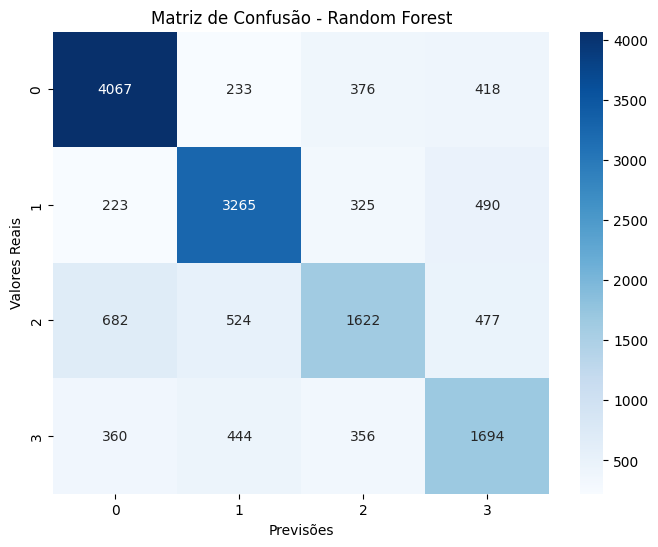

In [13]:
# Treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_resampled, y_train_resampled)

# Avaliar o modelo KNN
avaliar_modelo("K-Nearest Neighbors (KNN)", knn, X_val, new_labels_val)

# Treinar o modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Avaliar o modelo Random Forest
avaliar_modelo("Random Forest", rf, X_val, new_labels_val)

### Downsampling

In [14]:
from imblearn.under_sampling import RandomUnderSampler

down_sample_params = {
    "Equipamentos de informática (falha/substituição/instalação/configuração)": 2793,
    "Habilitação/Acesso a sistemas": 2793,
    "Programa/Sistema (instalação/configuração/erros/dúvidas/desenvolvimento)": 2793,
    "Outros": 2793
}

# Inicializar o undersampler
rus = RandomUnderSampler(sampling_strategy=down_sample_params)

# Aplicar o undersampling nos dados de treino
X_resampled, y_resampled = rus.fit_resample(X_train, new_labels_train)

# Verificar a nova contagem de itens em cada classe após o undersampling
print("Contagem de itens em cada label após undersampling (Random Undersampler):")
print(pd.Series(y_resampled).value_counts())

Contagem de itens em cada label após undersampling (Random Undersampler):
category1
Equipamentos de informática (falha/substituição/instalação/configuração)    2793
Habilitação/Acesso a sistemas                                               2793
Outros                                                                      2793
Programa/Sistema (instalação/configuração/erros/dúvidas/desenvolvimento)    2793
Name: count, dtype: int64


### K-Nearest Neighbors (KNN) ###
Acurácia: 0.5791
Recall (weighted): 0.5791
Relatório de Classificação:
                                                                          precision    recall  f1-score   support

Equipamentos de informática (falha/substituição/instalação/configuração)       0.62      0.73      0.67      5094
                                           Habilitação/Acesso a sistemas       0.59      0.69      0.64      4303
                                                                  Outros       0.52      0.39      0.45      3305
Programa/Sistema (instalação/configuração/erros/dúvidas/desenvolvimento)       0.50      0.35      0.41      2854

                                                                accuracy                           0.58     15556
                                                               macro avg       0.56      0.54      0.54     15556
                                                            weighted avg       0.57      0.58  

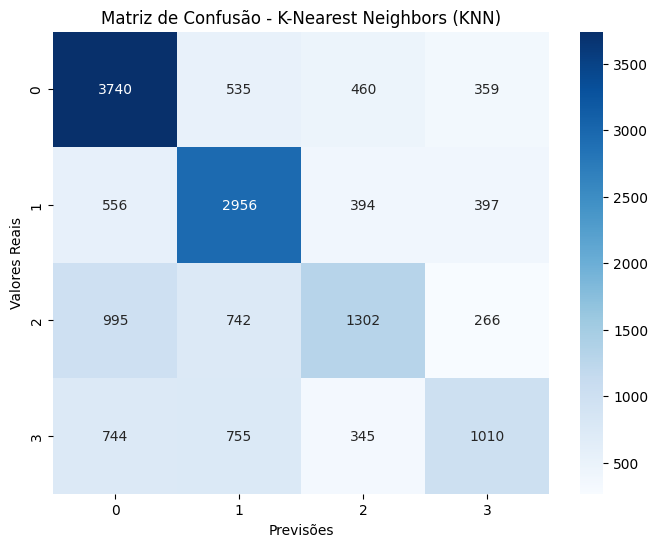

### Random Forest ###
Acurácia: 0.6711
Recall (weighted): 0.6711
Relatório de Classificação:
                                                                          precision    recall  f1-score   support

Equipamentos de informática (falha/substituição/instalação/configuração)       0.79      0.75      0.77      5094
                                           Habilitação/Acesso a sistemas       0.74      0.73      0.74      4303
                                                                  Outros       0.57      0.50      0.53      3305
Programa/Sistema (instalação/configuração/erros/dúvidas/desenvolvimento)       0.51      0.64      0.57      2854

                                                                accuracy                           0.67     15556
                                                               macro avg       0.65      0.65      0.65     15556
                                                            weighted avg       0.68      0.67      0.67    

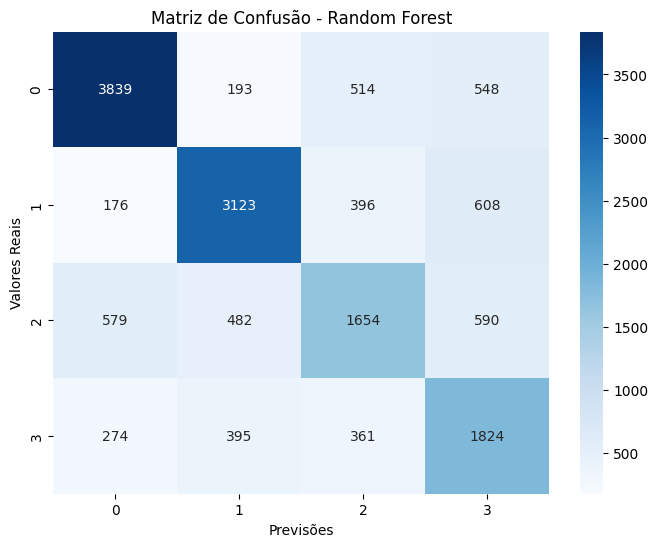

In [15]:
# Treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_resampled, y_resampled)

# Avaliar o modelo KNN
avaliar_modelo("K-Nearest Neighbors (KNN)", knn, X_val, new_labels_val)

# Treinar o modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_resampled, y_resampled)

# Avaliar o modelo Random Forest
avaliar_modelo("Random Forest", rf, X_val, new_labels_val)

### Using GridSearchCV to find best hyperparameters for each model

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

over_sample_params = {
    "Equipamentos de informática (falha/substituição/instalação/configuração)": 5074,
    "Habilitação/Acesso a sistemas": 5074,
    "Programa/Sistema (instalação/configuração/erros/dúvidas/desenvolvimento)": 5074,
    "Outros": 5074
}

# Aplicar a técnica SMOTE
smote = SMOTE(sampling_strategy=over_sample_params)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, new_labels_train)
y_train_resampled.value_counts()

knn = KNeighborsClassifier()

knn_param_grid = {
    'n_neighbors': list(range(2, 21)),  # Testando valores de 2 a 20 para o número de vizinhos
    'metric': ['euclidean', 'manhattan', 'cosine'],  # Diferentes métricas de distância
    'weights': ['uniform', 'distance']  # Pesos uniformes ou baseados na distância
}

grid_search = GridSearchCV(knn, knn_param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

knn_best_params = grid_search.best_params_
knn_best_score = grid_search.best_score_

def grid_search_with_early_stopping(X_train, y_train, param_grid, scoring='accuracy', patiente=3, min_delta=0.001):
    import numpy as np

    best_score = -np.inf
    no_improvement = 0

    for i, n_estimators in enumerate(param_grid['n_estimators']):
        current_param_grid = {**param_grid, 'n_estimators': [n_estimators]}

        rf = RandomForestClassifier(random_state=42)
        grid_search = GridSearchCV(rf, current_param_grid, cv=5, scoring=scoring, n_jobs=-1)

        grid_search.fit(X_train, y_train)

        if grid_search.best_score_ - best_score > min_delta:
            best_score = grid_search.best_score_
            best_params = grid_search.best_params_
            no_improvement = 0
        else:
            no_improvement += 1

        if no_improvement >= patiente:
            print(f"Early stopping at iteration {i}")
            break 

    return best_params, best_score

rf_param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árvores na floresta
    'max_depth': [None, 10, 20, 30],  # Profundidade máxima da árvore
    'min_samples_split': [2, 5, 10],  # Número mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de amostras em um nó folha
    'max_features': ['sqrt', 'log2', None],  # Número de recursos considerados para melhor divisão
    'bootstrap': [True, False]  # Usar ou não bootstrap
}

rf_best_params, rf_best_score = grid_search_with_early_stopping(X_train_resampled, y_train_resampled, rf_param_grid)

print("Melhores parâmetros para o KNN:", knn_best_params)
print("Acurácia média do KNN com os melhores parâmetros:", knn_best_score)
print("Melhores parâmetros para o Random Forest:", rf_best_params)
print("Acurácia média do Random Forest com os melhores parâmetros:", rf_best_score)

/opt/academics/IMD0188-APRENDIZADO_DE_MAQUINA/glpi_venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Melhores parâmetros para o KNN: {'metric': 'cosine', 'n_neighbors': 16, 'weights': 'distance'}
Acurácia média do KNN com os melhores parâmetros: 0.761531074289695
Melhores parâmetros para o Random Forest: {'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Acurácia média do Random Forest com os melhores parâmetros: 0.7786772810406115


### K-Nearest Neighbors (KNN) ###
Acurácia: 0.6187
Recall (weighted): 0.6187
Relatório de Classificação:
                                                                          precision    recall  f1-score   support

Equipamentos de informática (falha/substituição/instalação/configuração)       0.79      0.67      0.73      5094
                                           Habilitação/Acesso a sistemas       0.71      0.65      0.68      4303
                                                                  Outros       0.48      0.54      0.50      3305
Programa/Sistema (instalação/configuração/erros/dúvidas/desenvolvimento)       0.45      0.56      0.50      2854

                                                                accuracy                           0.62     15556
                                                               macro avg       0.61      0.61      0.60     15556
                                                            weighted avg       0.64      0.62  

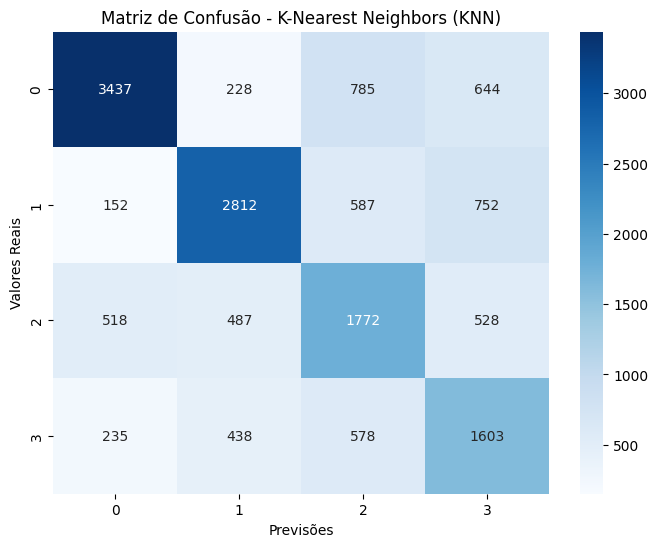

### Random Forest ###
Acurácia: 0.6911
Recall (weighted): 0.6911
Relatório de Classificação:
                                                                          precision    recall  f1-score   support

Equipamentos de informática (falha/substituição/instalação/configuração)       0.76      0.82      0.79      5094
                                           Habilitação/Acesso a sistemas       0.73      0.77      0.75      4303
                                                                  Outros       0.63      0.48      0.55      3305
Programa/Sistema (instalação/configuração/erros/dúvidas/desenvolvimento)       0.56      0.58      0.57      2854

                                                                accuracy                           0.69     15556
                                                               macro avg       0.67      0.66      0.66     15556
                                                            weighted avg       0.69      0.69      0.69    

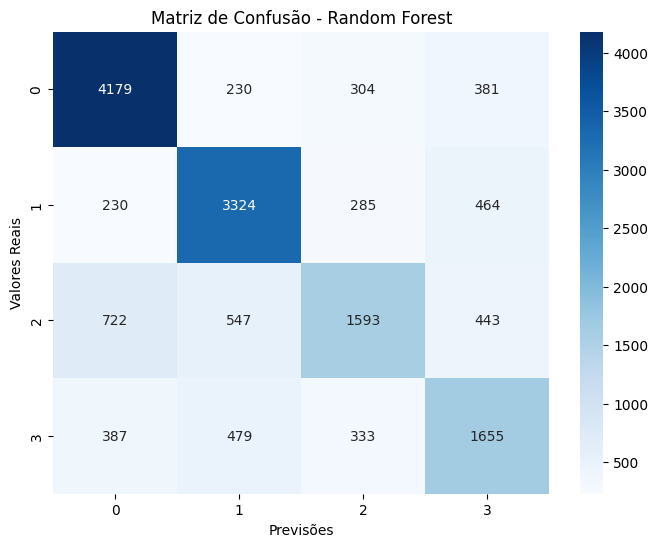

In [17]:
# Treinar o modelo KNN
knn = KNeighborsClassifier(**knn_best_params)
knn.fit(X_train_resampled, y_train_resampled)

# Avaliar o modelo KNN
avaliar_modelo("K-Nearest Neighbors (KNN)", knn, X_val, new_labels_val)

# Treinar o modelo Random Forest
rf = RandomForestClassifier(**rf_best_params, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Avaliar o modelo Random Forest
avaliar_modelo("Random Forest", rf, X_val, new_labels_val)